# Trabalho de Deep Learning - FIAP - Professor Felipe Teodoro

## Alunos

RM 340544 - Mauricio Raghe Binda <br>
RM 341704 - Ricardo da Silva Cruz <br>
RM 340347 - Rodrigo de Miranda Videira  <br>

___

## Exercício 6

## Imports

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [110]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [111]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# 28 X 28

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


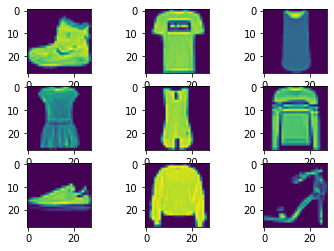

In [112]:
# Imagens do dataset
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

In [113]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [114]:
num_classes = len(np.unique(y_train))
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [115]:
y_train.shape # 10 classes

(60000, 10)

In [116]:
classes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [117]:
# Dividindo dataset em treino e validação
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.8, random_state=42)

In [118]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

48000 train samples
10000 test samples
12000 validation samples


In [119]:
# Funções de ativação para teste
ativacoes = ['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential']

In [120]:
# Criando o modelo

In [121]:
def criar_modelo(ativacao):
    model = Sequential()
    model.add(Conv2D(filters=24, kernel_size=3, padding='same', activation=ativacao, input_shape=(28, 28, 1)))                        
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=10, kernel_size=6, padding='same', activation=ativacao))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(120, activation=ativacao))
    model.add(Dropout(0.3))
    model.add(Dense(84, activation=ativacao))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [122]:
modelo_fashion_mint = criar_modelo('relu')
modelo_fashion_mint.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 24)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 14, 14, 24)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 10)        8650      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 10)         0         
 g2D)                                                            
                                                                 
 dropout_49 (Dropout)        (None, 7, 7, 10)        

In [123]:
modelo_fashion_mint.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [124]:
checkpointer = ModelCheckpoint(filepath='modelos/fashion_mint.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #
                              
hist = modelo_fashion_mint.fit(x_train, y_train, batch_size=200, epochs=5, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/5
240/240 [==============================] - ETA: 0s - loss: 0.9336 - accuracy: 0.6479
Epoch 1: val_accuracy improved from -inf to 0.81567, saving model to fashion_mint.hdf5
240/240 [==============================] - 37s 151ms/step - loss: 0.9336 - accuracy: 0.6479 - val_loss: 0.4948 - val_accuracy: 0.8157
Epoch 2/5
240/240 [==============================] - ETA: 0s - loss: 0.5421 - accuracy: 0.7985
Epoch 2: val_accuracy improved from 0.81567 to 0.85533, saving model to fashion_mint.hdf5
240/240 [==============================] - 36s 150ms/step - loss: 0.5421 - accuracy: 0.7985 - val_loss: 0.4083 - val_accuracy: 0.8553
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: 0.4652 - accuracy: 0.8303
Epoch 3: val_accuracy improved from 0.85533 to 0.86492, saving model to fashion_mint.hdf5
240/240 [==============================] - 36s 148ms/step - loss: 0.4652 - accuracy: 0.8303 - val_loss: 0.3640 - val_accuracy: 0.8649
Epoch 4/5
240/240 [===========================

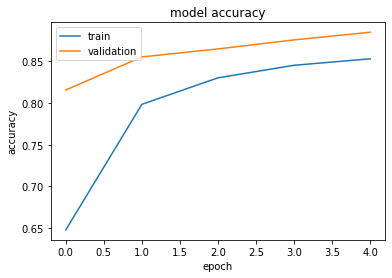

In [125]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [126]:
score = modelo_fashion_mint.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8812000155448914


In [127]:
###### Criando função para testar todas as funções de ativação

In [128]:
ativacao_modelos = {}
for key in ativacoes:
    ativacao_modelos[key] = {"accuracy" : 0}

def print_grafico(hist_por_ativacao, ativacao):
    plt.figure(1)
    plt.plot(hist_por_ativacao.history['accuracy'])
    plt.plot(hist_por_ativacao.history['val_accuracy'])
    plt.title('model accuracy - ' + ativacao)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def modelo_por_funcao(ativacao, print_imagem=True):
    
    modelo_fashion_mint_por_ativacao = criar_modelo(ativacao)
    modelo_fashion_mint_por_ativacao.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    checkpointer = ModelCheckpoint(filepath=f'modelos/fashion_mint_{ativacao}.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #
                              
    hist_por_ativacao = modelo_fashion_mint_por_ativacao.fit(x_train, y_train, batch_size=200, epochs=5, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)
    
    if print_imagem:
        print_grafico(hist_por_ativacao, ativacao)
        
    score = modelo_fashion_mint_por_ativacao.evaluate(x_test, y_test, verbose=0)

    ativacao_modelos[ativacao]['accuracy'] = score[1]

relu
Epoch 1/5
240/240 [==============================] - ETA: 0s - loss: 0.9280 - accuracy: 0.6497
Epoch 1: val_accuracy improved from -inf to 0.81000, saving model to fashion_mint_relu.hdf5
240/240 [==============================] - 42s 173ms/step - loss: 0.9280 - accuracy: 0.6497 - val_loss: 0.5132 - val_accuracy: 0.8100
Epoch 2/5
240/240 [==============================] - ETA: 0s - loss: 0.5478 - accuracy: 0.7979
Epoch 2: val_accuracy improved from 0.81000 to 0.85025, saving model to fashion_mint_relu.hdf5
240/240 [==============================] - 39s 164ms/step - loss: 0.5478 - accuracy: 0.7979 - val_loss: 0.4114 - val_accuracy: 0.8503
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: 0.4733 - accuracy: 0.8270
Epoch 3: val_accuracy improved from 0.85025 to 0.86083, saving model to fashion_mint_relu.hdf5
240/240 [==============================] - 43s 181ms/step - loss: 0.4733 - accuracy: 0.8270 - val_loss: 0.3767 - val_accuracy: 0.8608
Epoch 4/5
240/240 [=======

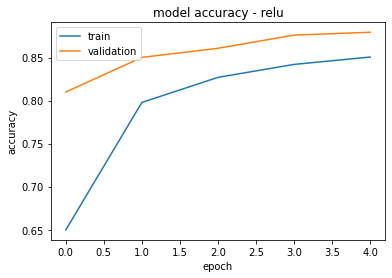

sigmoid
Epoch 1/5
240/240 [==============================] - ETA: 0s - loss: 2.3159 - accuracy: 0.1157
Epoch 1: val_accuracy improved from -inf to 0.34275, saving model to fashion_mint_sigmoid.hdf5
240/240 [==============================] - 40s 164ms/step - loss: 2.3159 - accuracy: 0.1157 - val_loss: 1.9947 - val_accuracy: 0.3428
Epoch 2/5
240/240 [==============================] - ETA: 0s - loss: 1.2113 - accuracy: 0.5479
Epoch 2: val_accuracy improved from 0.34275 to 0.70825, saving model to fashion_mint_sigmoid.hdf5
240/240 [==============================] - 40s 165ms/step - loss: 1.2113 - accuracy: 0.5479 - val_loss: 0.8014 - val_accuracy: 0.7082
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: 0.8030 - accuracy: 0.6971
Epoch 3: val_accuracy improved from 0.70825 to 0.74842, saving model to fashion_mint_sigmoid.hdf5
240/240 [==============================] - 40s 167ms/step - loss: 0.8030 - accuracy: 0.6971 - val_loss: 0.6573 - val_accuracy: 0.7484
Epoch 4/5
240/

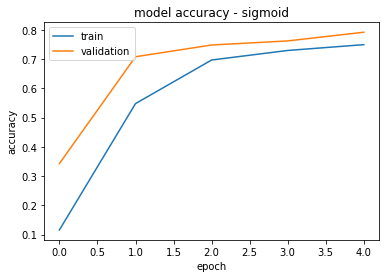

softmax
Epoch 1/5
240/240 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.0992
Epoch 1: val_accuracy improved from -inf to 0.10042, saving model to fashion_mint_softmax.hdf5
240/240 [==============================] - 45s 186ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1004
Epoch 2/5
240/240 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.0993
Epoch 2: val_accuracy did not improve from 0.10042
240/240 [==============================] - 45s 189ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: 2.2627 - accuracy: 0.1877
Epoch 3: val_accuracy improved from 0.10042 to 0.27267, saving model to fashion_mint_softmax.hdf5
240/240 [==============================] - 44s 182ms/step - loss: 2.2627 - accuracy: 0.1877 - val_loss: 2.1637 - val_accuracy: 0.2727
Epoch 4/5
240/240 [==============================] - ETA: 0s 

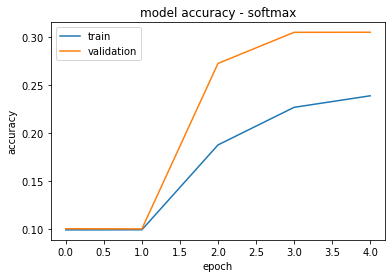

softplus
Epoch 1/5
240/240 [==============================] - ETA: 0s - loss: 1.9424 - accuracy: 0.2711
Epoch 1: val_accuracy improved from -inf to 0.69675, saving model to fashion_mint_softplus.hdf5
240/240 [==============================] - 47s 192ms/step - loss: 1.9424 - accuracy: 0.2711 - val_loss: 0.8369 - val_accuracy: 0.6967
Epoch 2/5
240/240 [==============================] - ETA: 0s - loss: 0.8982 - accuracy: 0.6520
Epoch 2: val_accuracy improved from 0.69675 to 0.74550, saving model to fashion_mint_softplus.hdf5
240/240 [==============================] - 45s 188ms/step - loss: 0.8982 - accuracy: 0.6520 - val_loss: 0.6688 - val_accuracy: 0.7455
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: 0.7494 - accuracy: 0.7102
Epoch 3: val_accuracy improved from 0.74550 to 0.78008, saving model to fashion_mint_softplus.hdf5
240/240 [==============================] - 45s 189ms/step - loss: 0.7494 - accuracy: 0.7102 - val_loss: 0.6007 - val_accuracy: 0.7801
Epoch 4/5


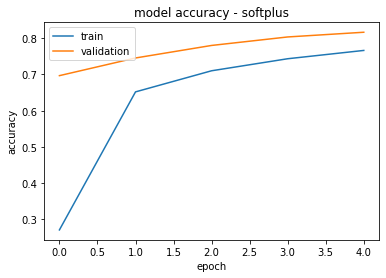

softsign
Epoch 1/5
240/240 [==============================] - ETA: 0s - loss: 0.7995 - accuracy: 0.7168
Epoch 1: val_accuracy improved from -inf to 0.81775, saving model to fashion_mint_softsign.hdf5
240/240 [==============================] - 40s 163ms/step - loss: 0.7995 - accuracy: 0.7168 - val_loss: 0.4906 - val_accuracy: 0.8177
Epoch 2/5
240/240 [==============================] - ETA: 0s - loss: 0.4867 - accuracy: 0.8237
Epoch 2: val_accuracy improved from 0.81775 to 0.86117, saving model to fashion_mint_softsign.hdf5
240/240 [==============================] - 39s 162ms/step - loss: 0.4867 - accuracy: 0.8237 - val_loss: 0.3857 - val_accuracy: 0.8612
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: 0.4307 - accuracy: 0.8449
Epoch 3: val_accuracy improved from 0.86117 to 0.87108, saving model to fashion_mint_softsign.hdf5
240/240 [==============================] - 39s 163ms/step - loss: 0.4307 - accuracy: 0.8449 - val_loss: 0.3509 - val_accuracy: 0.8711
Epoch 4/5


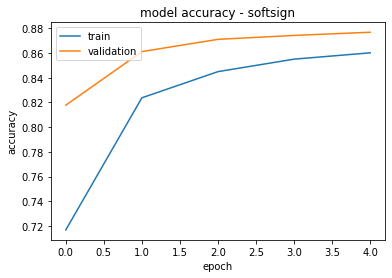

tanh
Epoch 1/5
240/240 [==============================] - ETA: 0s - loss: 0.7459 - accuracy: 0.7265
Epoch 1: val_accuracy improved from -inf to 0.84283, saving model to fashion_mint_tanh.hdf5
240/240 [==============================] - 40s 164ms/step - loss: 0.7459 - accuracy: 0.7265 - val_loss: 0.4408 - val_accuracy: 0.8428
Epoch 2/5
240/240 [==============================] - ETA: 0s - loss: 0.4823 - accuracy: 0.8249
Epoch 2: val_accuracy improved from 0.84283 to 0.86000, saving model to fashion_mint_tanh.hdf5
240/240 [==============================] - 40s 166ms/step - loss: 0.4823 - accuracy: 0.8249 - val_loss: 0.3821 - val_accuracy: 0.8600
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: 0.4332 - accuracy: 0.8456
Epoch 3: val_accuracy improved from 0.86000 to 0.87558, saving model to fashion_mint_tanh.hdf5
240/240 [==============================] - 40s 165ms/step - loss: 0.4332 - accuracy: 0.8456 - val_loss: 0.3455 - val_accuracy: 0.8756
Epoch 4/5
240/240 [=======

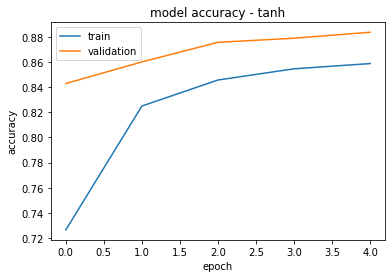

selu
Epoch 1/5
240/240 [==============================] - ETA: 0s - loss: 0.7229 - accuracy: 0.7388
Epoch 1: val_accuracy improved from -inf to 0.84100, saving model to fashion_mint_selu.hdf5
240/240 [==============================] - 41s 167ms/step - loss: 0.7229 - accuracy: 0.7388 - val_loss: 0.4437 - val_accuracy: 0.8410
Epoch 2/5
240/240 [==============================] - ETA: 0s - loss: 0.4936 - accuracy: 0.8235
Epoch 2: val_accuracy improved from 0.84100 to 0.86383, saving model to fashion_mint_selu.hdf5
240/240 [==============================] - 40s 167ms/step - loss: 0.4936 - accuracy: 0.8235 - val_loss: 0.3780 - val_accuracy: 0.8638
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: 0.4433 - accuracy: 0.8409
Epoch 3: val_accuracy improved from 0.86383 to 0.87600, saving model to fashion_mint_selu.hdf5
240/240 [==============================] - 40s 169ms/step - loss: 0.4433 - accuracy: 0.8409 - val_loss: 0.3455 - val_accuracy: 0.8760
Epoch 4/5
240/240 [=======

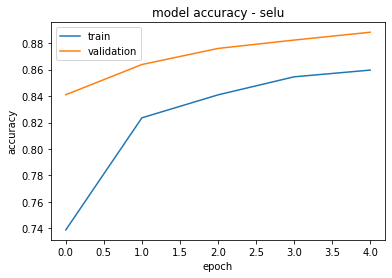

elu
Epoch 1/5
240/240 [==============================] - ETA: 0s - loss: 0.7514 - accuracy: 0.7207
Epoch 1: val_accuracy improved from -inf to 0.83417, saving model to fashion_mint_elu.hdf5
240/240 [==============================] - 41s 169ms/step - loss: 0.7514 - accuracy: 0.7207 - val_loss: 0.4672 - val_accuracy: 0.8342
Epoch 2/5
240/240 [==============================] - ETA: 0s - loss: 0.4882 - accuracy: 0.8240
Epoch 2: val_accuracy improved from 0.83417 to 0.86492, saving model to fashion_mint_elu.hdf5
240/240 [==============================] - 40s 167ms/step - loss: 0.4882 - accuracy: 0.8240 - val_loss: 0.3733 - val_accuracy: 0.8649
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: 0.4343 - accuracy: 0.8426
Epoch 3: val_accuracy improved from 0.86492 to 0.87350, saving model to fashion_mint_elu.hdf5
240/240 [==============================] - 40s 167ms/step - loss: 0.4343 - accuracy: 0.8426 - val_loss: 0.3487 - val_accuracy: 0.8735
Epoch 4/5
240/240 [===========

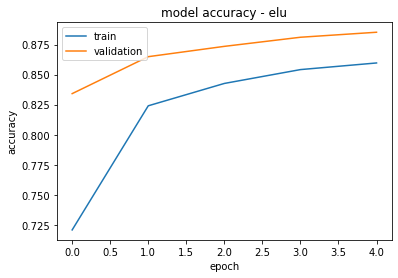

exponential
Epoch 1/5
240/240 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1000
Epoch 1: val_accuracy improved from -inf to 0.10017, saving model to fashion_mint_exponential.hdf5
240/240 [==============================] - 39s 160ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1002
Epoch 2/5
240/240 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1000
Epoch 2: val_accuracy did not improve from 0.10017
240/240 [==============================] - 38s 159ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1002
Epoch 3/5
240/240 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1000
Epoch 3: val_accuracy did not improve from 0.10017
240/240 [==============================] - 40s 169ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1002
Epoch 4/5
240/240 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1000
Epoch 4: val_accuracy did not impro

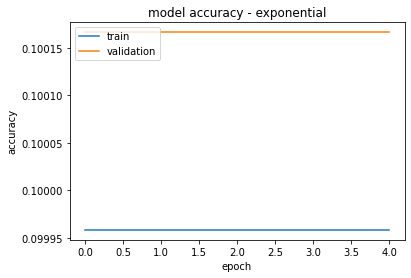

,relu,sigmoid,softmax,softplus,softsign,tanh,selu,elu,exponential
accuracy,0.8731,0.7831,0.3016,0.8087,0.8736,0.879,0.881,0.88,0.1


In [129]:
for ativacao in ativacoes:
    print(ativacao)
    modelo_por_funcao(ativacao)
    
df_todas_ativacoes = pd.DataFrame(ativacao_modelos)
df_todas_ativacoes

In [130]:
df_todas_ativacoes

,relu,sigmoid,softmax,softplus,softsign,tanh,selu,elu,exponential
accuracy,0.8731,0.7831,0.3016,0.8087,0.8736,0.879,0.881,0.88,0.1


In [131]:
best_model = tf.keras.models.load_model('modelos/fashion_mint_elu.hdf5')

In [132]:
y_predito = best_model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


Index - 5675
Acertou Sim

Figura escolhida - Sneaker



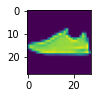

Figura predita - Sneaker
______________________________
Index - 3220
Acertou Sim

Figura escolhida - Coat



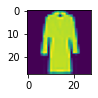

Figura predita - Coat
______________________________
Index - 1408
Acertou Não

Figura escolhida - Coat



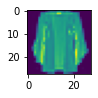

Figura predita - Shirt
______________________________
Index - 387
Acertou Sim

Figura escolhida - Shirt



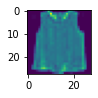

Figura predita - Shirt
______________________________
Index - 4764
Acertou Sim

Figura escolhida - Dress



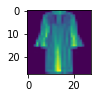

Figura predita - Dress
______________________________
Index - 3423
Acertou Sim

Figura escolhida - Sneaker



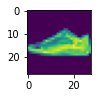

Figura predita - Sneaker
______________________________
Index - 5767
Acertou Sim

Figura escolhida - Trouser



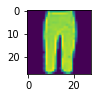

Figura predita - Trouser
______________________________
Index - 4057
Acertou Sim

Figura escolhida - Sandal



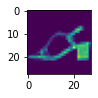

Figura predita - Sandal
______________________________
Index - 4508
Acertou Sim

Figura escolhida - T-shirt/top



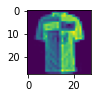

Figura predita - T-shirt/top
______________________________
Index - 894
Acertou Sim

Figura escolhida - T-shirt/top



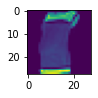

Figura predita - T-shirt/top
______________________________
Index - 6295
Acertou Sim

Figura escolhida - Pullover



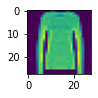

Figura predita - Pullover
______________________________
Index - 6414
Acertou Sim

Figura escolhida - Dress



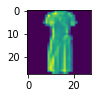

Figura predita - Dress
______________________________
Index - 8095
Acertou Sim

Figura escolhida - T-shirt/top



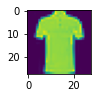

Figura predita - T-shirt/top
______________________________
Index - 7175
Acertou Sim

Figura escolhida - Sneaker



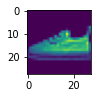

Figura predita - Sneaker
______________________________
Index - 4375
Acertou Sim

Figura escolhida - Ankle boot



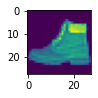

Figura predita - Ankle boot
______________________________
Index - 8128
Acertou Sim

Figura escolhida - T-shirt/top



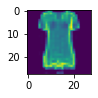

Figura predita - T-shirt/top
______________________________
Index - 8219
Acertou Sim

Figura escolhida - Shirt



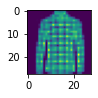

Figura predita - Shirt
______________________________
Index - 1516
Acertou Sim

Figura escolhida - Sneaker



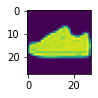

Figura predita - Sneaker
______________________________
Index - 1867
Acertou Não

Figura escolhida - T-shirt/top



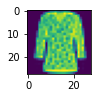

Figura predita - Shirt
______________________________
Index - 2071
Acertou Não

Figura escolhida - Dress



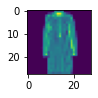

Figura predita - Coat
______________________________


In [133]:

for index in np.random.randint(len(x_test), size=20):
    true_idx = np.argmax(y_test[index])
    pred_idx = np.argmax(y_predito[index])
    
    print(f"Index - {index}")
    
    acerto =   'Sim' if (pred_idx == true_idx) else 'Não'
    print(f"Acertou {acerto}")
    print()
    
    print(f"Figura escolhida - {classes_labels[true_idx]}")
    print()
    
    plt.subplot(330 + 1 + i)
    #cmap
    plt.imshow(x_test[index])
    plt.show()
    
    print(f"Figura predita - {classes_labels[pred_idx]}")

    print(30* "_")